# Hierarchical Clustering
En este jupyter notebook vamos a aprender lo siguiente:

*   Conocer el ambiente Google Colab
*   Usar ***R*** en Google Colab
*   Realizar Hierarchical Clustering con diferentes tipos de $linkage$
*   Visualizar un Dendrograma
*   Obtener los clusters a determinada altura de corte del Dendrograma


El código fuente esta basado en el **Laboratorio 2 Clustering: 10.5.2. Hierarchical Clustering, Capítulo 10** del libro *Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani - An Introduction to Statistical Learning with Applications in R-Springer (2014)*

## Conociendo el ambiente Google Colab

El ambiente Google Colab nos permite ejecutar codigo ***Python*** en nuestro navegador:
*   Sin ninguna configuración previa
*   Acceso gratuito a GPUs
*   Facil de compartir

Para mayor información, visistar lo siguientes links:
*   [¿Qué es Google Colab?](https://colab.research.google.com/notebooks/intro.ipynb)
*   [¿Como montar el Google Drive para ser usado en Google Colab?](https://colab.research.google.com/notebooks/io.ipynb)

Podemos comenzar a ejecutar algunas operaciones matemáticas en Google Colab.
```python
5+5
```
```python
5*5
```
```python
((5+5)*5+20)/15
```
Existen 3 métodos para ejecutar una celda:
* Apretar el boton de play al inicio de la celda.
* Presionar ***CTRL + ENTER***.
* Presionar ***SHIFT + ENTER***, lo cual agregará una celda al final.

In [ ]:
((5+5)*5+20)/15

4.666666666666667

## Usando ***R*** en Google Colab

Debido a que inicialmente Google Colab fue creado para programar en lenguaje ***Python***, es necesario configurar el ambiente para poder usar ***R***. Para mayor información, visitar el siguiente link: [Como usar R en Google Colab](https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497)

Solo será necesario ejecutar la siguiente celda al inicio de cada Google Colab:
```python
%load_ext rpy2.ipython
```
Y adicionar la siguiente linea al inicio de cada celda:
```python
%%R
```
De esa manera Google Colab sabrá que esa celda contiene codigo en lenguaje ***R***.

Ademas, de esta manera podemos ejecutar codigo en ***Python*** y ***R*** en el mismo Google Colab.

In [1]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Ejecutemos las siguientes lineas para conocer la versión de ***R*** con la que estamos trabajando:
```python
%%R
R.version
```

In [ ]:
%%R
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.4                         
year           2021                        
month          02                          
day            15                          
svn rev        80002                       
language       R                           
version.string R version 4.0.4 (2021-02-15)
nickname       Lost Library Book           


## Hierarchical Clustering

### Base de datos

Creamos una base de datos:
* Observaciones: $n=25$
* Atributos: $p=2$

Vamos a tener 2 grupos de observaciones.

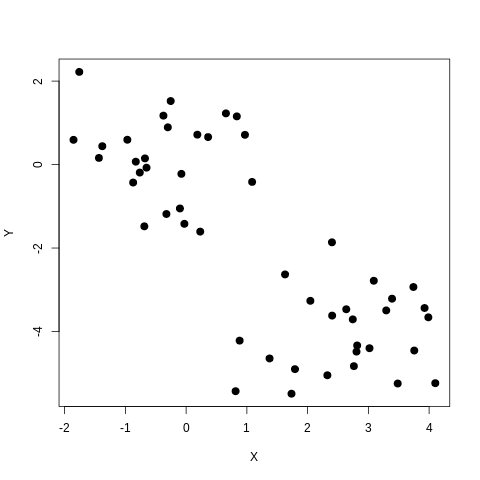

In [43]:
%%R
# Fijamos el seed para poder reproducir el experimento
set.seed(10)

x = matrix(rnorm(50*2), ncol=2)

x[1:25,1] = x[1:25,1] + 3
x[1:25,2] = x[1:25,2] - 4
plot(x, xlab ="X", ylab ="Y", pch =20, cex =2)

### Usando la función ***hclust***

La función *hclust* de ***R*** realiza agrupamiento usando Hierarchical Clustering.

```python
hclust(dist(x), method="complete")
hclust(dist(x), method="average")
hclust(dist(x), method="single")
```
* dist(x): distancias Euclidianas entre todas las observaciones.
* method: tipo de $linkage$.

Para mayor información sobre los parametros de entrada y salida, visitar la [documentación de la función](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/hclust).

In [34]:
%%R
hc.complete = hclust(dist(x), method="complete")
hc.average = hclust(dist(x), method="average")
hc.single = hclust(dist(x), method="single")

### Visualizando los Dendrogramas

Complete Linkage

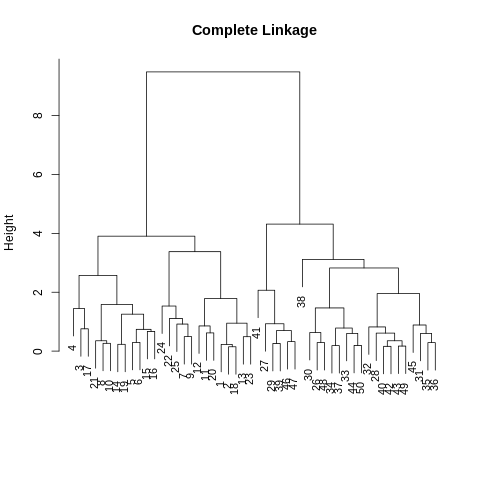

In [37]:
%%R
plot(hc.complete, main="Complete Linkage", xlab="", sub="", cex=.9)

Average Linkage

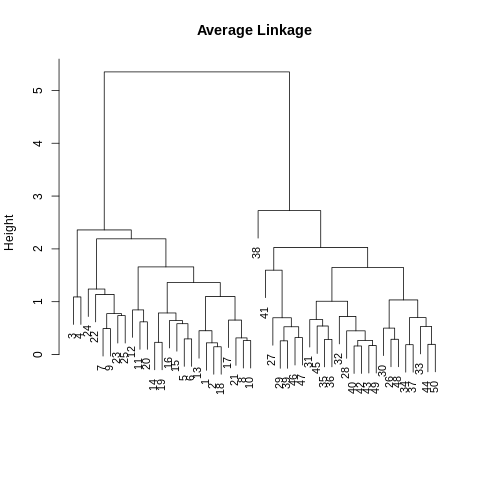

In [36]:
%%R
plot(hc.average, main="Average Linkage", xlab="", sub="", cex=.9)

Single Linkage

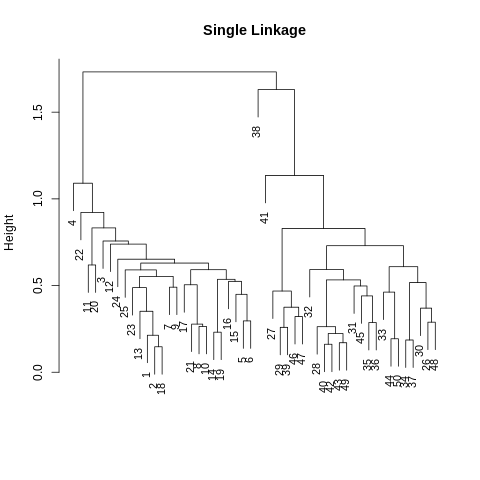

In [35]:
%%R
plot(hc.single, main="Single Linkage", xlab="", sub="", cex=.9)

### Corte del Dendrograma

Con la función ***cutree*** podemos obtener a que cluster pertenece cada observación a determinada altura de corte del Dendrograma

In [44]:
%%R
cutree(hc.complete, 2)
# cutree(hc.average, 2)
# cutree(hc.single, 4)

 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2


### Normalización de los atributos

Con la función ***scale*** podemos normalizar los atributos

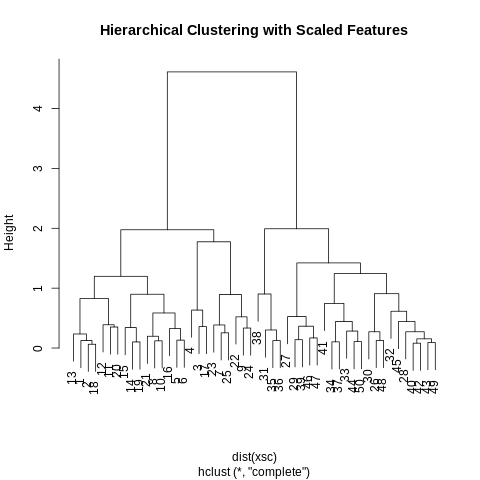

In [42]:
%%R
xsc = scale(x)
plot(hclust(dist(xsc), method="complete"), main="Hierarchical Clustering with Scaled Features")